# Step 1: Data Ingestion

In [1]:
import numpy as np
import pandas as pd
import os
import pathlib

# data viz
from matplotlib import pyplot as plt
import seaborn as sns           # for nicer plots
sns.set(style="darkgrid")       # default style

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTENC


In [2]:
notebook_dir = pathlib.Path(os.getcwd()) 
csvdir_path = notebook_dir.parent / "data" / "external" 
file_name = "FPA_FOD_Plus.csv"
file_path = f"{csvdir_path}/{file_name}"

In [3]:
df_init = pd.read_csv(file_path)

/var/folders/l5/nv1yy17503b71cs9y247p65w0000gn/T/ipykernel_18928/477084150.py:1: DtypeWarning: Columns (9,11,13,14,15,16,17,52,53,60,62,63,64,307) have mixed types. Specify dtype option on import or set low_memory=False.
  df_init = pd.read_csv(file_path)


In [4]:
# 1. how many columns does the dataset contain?
print(f"The number of columns in the dataset: {df_init.shape[1]}")

# 2. how many rows are there in the dataset?
print(f"The number of rows in the dataset: {df_init.shape[0]}")

The number of columns in the dataset: 308
The number of rows in the dataset: 2302521


In [5]:
# drop columns that have the number of missing values greater than 80%
cutoff_missing_values = df_init.shape[0]*0.8
missing_vals = df_init.isna().sum().sort_values(ascending=False)
cols_missing_gt80pct = list(missing_vals[missing_vals > cutoff_missing_values].index)
df = df_init.drop(columns=cols_missing_gt80pct)

### Getting to know the data

In [6]:
# 1. how many columns does the dataset contain?
print(f"The number of columns in the dataset: {df.shape[1]}")

# 2. how many rows are there in the dataset?
print(f"The number of rows in the dataset: {df.shape[0]}")

# 3. what are the column names?
print(f"Column names int the dataset: {list(df.columns)}")

The number of columns in the dataset: 286
The number of rows in the dataset: 2302521
Column names int the dataset: ['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'LatLong_State', 'LatLong_County', 'NPL', 'Mang_Type', 'Mang_Name', 'Des_Tp', 'GAP_Sts', 'GAP_Prity', 'EVH', 'EVT', 'EVH_1km', 'EVT_1km', 'EVC', 'EVC_1km', 'NAME', 'MOD_NDVI_12m', 'MOD_EVI_12m', 'Land_Cover', 'Land_Cover_1km', 'rpms', 'rpms_1km', 'Population', 'Popo_1km', 'GACCAbbrev', 'GACC_PL', 'GACC_New fire', 'GACC_New LF', 'GACC_Uncont LF', 'GACC_Type 1 

In [7]:
# check for duplicates of id vars
print(f"Number of duplicates in FOD_ID: {df.FOD_ID.duplicated().sum()}")
print(f"Number of duplicates in FPA_ID: {df.FPA_ID.duplicated().sum()}")

Number of duplicates in FOD_ID: 64
Number of duplicates in FPA_ID: 0


In [8]:
cols_show = ['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE']
df[df.FOD_ID.duplicated(keep=False)][cols_show].sort_values(by=['FOD_ID', 'FPA_ID']).head(8)

,FOD_ID,FPA_ID,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,LATITUDE,LONGITUDE
1953439,400632894,ICS209_2019_10664126,IA-ICS209,FS,OK 742,2019,2019-03-20,79,32.939277,-87.329210
2194351,400632894,IRW-2020-AKSWS-004278,IA-IRWIN,ST/C&L,ANIAK RIVER,2020,2020-06-16,168,61.406390,-159.304009
1976222,400632895,ICS209_2019_10671249,IA-ICS209,ST/C&L,BURNOUT LANE (07),2019,2019-06-29,180,30.405556,-85.615000
2190116,400632895,IRW-2020-AKSWS-004127,IA-IRWIN,ST/C&L,DECOURCY MOUNTAIN,2020,2020-05-31,152,62.108317,-158.495323
1953301,400632897,ICS209_2019_10674072,IA-ICS209,DOD,WET POND,2019,2019-03-20,79,30.490000,-86.820000
2189624,400632897,IRW-2020-AKSWS-004126,IA-IRWIN,ST/C&L,SMITH CREEK,2020,2020-05-30,151,62.115333,-158.497256
1953576,400632898,ICS209_2019_10674112,IA-ICS209,DOD,NAME,2019,2019-03-21,80,30.450000,-86.770000
2195101,400632898,IRW-2020-AKSWS-004286,IA-IRWIN,ST/C&L,BLACK RIVER,2020,2020-06-18,170,62.485001,-156.176307


Note: FOD_ID are valid duplicates. The unique identifier in this data set is FPA_ID. There are no duplicates in FPA_ID.

### Choosing the prediction task

`Consider FIRE_SIZE_CLASS`

In [9]:
df.FIRE_SIZE_CLASS.value_counts()

FIRE_SIZE_CLASS
B    1103730
A     876238
C     256879
D      34003
E      17193
F       9694
G       4784
Name: count, dtype: int64

<Axes: xlabel='FIRE_SIZE_CLASS'>

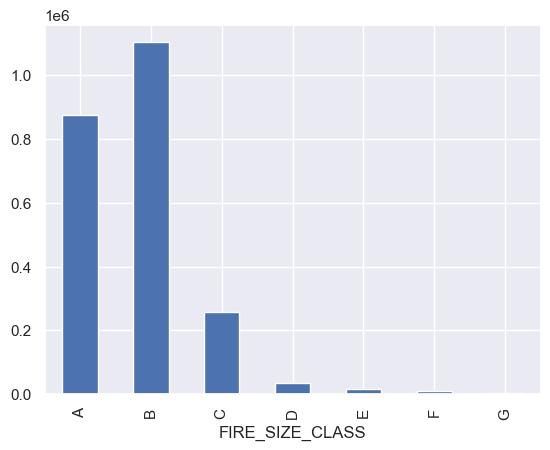

In [10]:
df.FIRE_SIZE_CLASS.value_counts().sort_index().plot.bar()

Note: class imbalance is observed

`Consider FIRE_SIZE`

In [11]:
df.FIRE_SIZE.dtypes

dtype('float64')

In [12]:
df.FIRE_SIZE.describe()

count    2.302521e+06
mean     7.817802e+01
std      2.631077e+03
min      1.000000e-05
25%      1.000000e-01
50%      8.000000e-01
75%      3.000000e+00
max      6.627000e+05
Name: FIRE_SIZE, dtype: float64

In [13]:
print(f"Fire size max: {df.FIRE_SIZE.max():.5f}")
print(f"Fire size minimum: {df.FIRE_SIZE.min():.5f}")

Fire size max: 662700.00000
Fire size minimum: 0.00001


<Axes: ylabel='Frequency'>

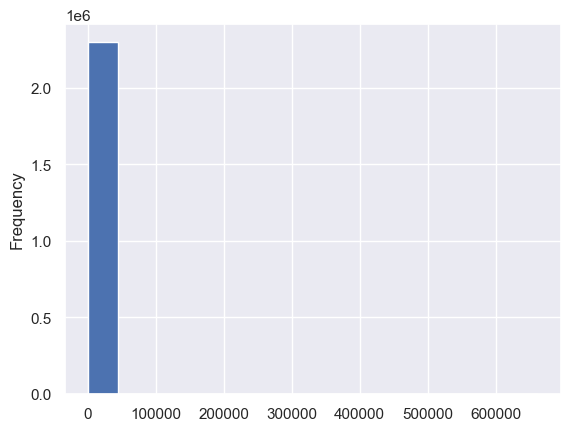

In [14]:
df.FIRE_SIZE.plot.hist(bins=15)

Note: FIRE_SIZE variable has a very skewed distribution

In [15]:
# look at FIRE_SIZE of FIRE_CLASS "G"
firecl_g = df[df.FIRE_SIZE_CLASS == 'G'].FIRE_SIZE

In [16]:
firecl_g.describe()

count      4784.000000
mean      28238.712241
std       50249.384807
min        5000.000000
25%        7198.000000
50%       12200.500000
75%       26118.925000
max      662700.000000
Name: FIRE_SIZE, dtype: float64

In [17]:
print(f"Fire size max: {df.FIRE_SIZE.max():.5f}")
print(f"Fire size minimum: {df.FIRE_SIZE.min():.5f}")

Fire size max: 662700.00000
Fire size minimum: 0.00001


<Axes: ylabel='Frequency'>

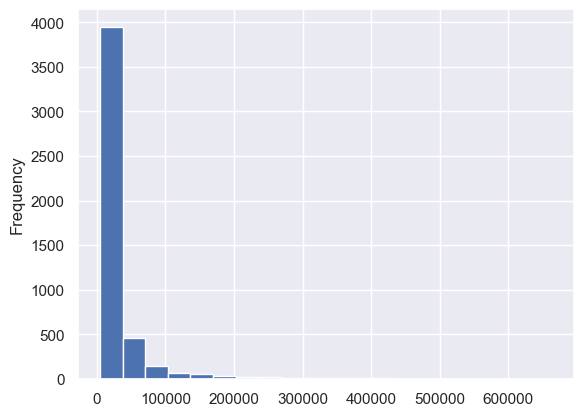

In [18]:
firecl_g.plot.hist(bins=20)

Note: Distribution of fire_size in the subset G is still skewed, but less than the skewness of fire_size distribution in the overall samples.

`Create fire_size cutoff`

In [19]:
# binning approach 1
bins_01 = [0, 999, 5000, 700000]                    # 999: max value of fire_size_class E, 5000: min value of fire_size_class G
fire_cats_01 = pd.cut(df.FIRE_SIZE, bins_01)
print(f"{fire_cats_01.value_counts()}")
print(f"\n{fire_cats_01.value_counts(normalize=True)}")

FIRE_SIZE
(0, 999]          2288042
(999, 5000]          9780
(5000, 700000]       4699
Name: count, dtype: int64

FIRE_SIZE
(0, 999]          0.993712
(999, 5000]       0.004248
(5000, 700000]    0.002041
Name: proportion, dtype: float64


In [20]:
# binning approach 2
bins_02 = [0, 4999, 700000]                     # 4999: max value of fire_size_class F
fire_cats_02 = pd.cut(df.FIRE_SIZE, bins_02)
print(f"{fire_cats_02.value_counts()}")
print(f"\n{fire_cats_02.value_counts(normalize=True)}")

FIRE_SIZE
(0, 4999]         2297737
(4999, 700000]       4784
Name: count, dtype: int64

FIRE_SIZE
(0, 4999]         0.997922
(4999, 700000]    0.002078
Name: proportion, dtype: float64


In [21]:
# binning approach 3
bins_03 = [0, 4999, 29000, 700000]       # 4999: max value of fire_size_class F, 29000: aprox. mean value of fire_size_class G
fire_cats_03 = pd.cut(df.FIRE_SIZE, bins_03)
print(f"{fire_cats_03.value_counts()}")
print(f"\n{fire_cats_03.value_counts(normalize=True)}")

FIRE_SIZE
(0, 4999]          2297737
(4999, 29000]         3682
(29000, 700000]       1102
Name: count, dtype: int64

FIRE_SIZE
(0, 4999]          0.997922
(4999, 29000]      0.001599
(29000, 700000]    0.000479
Name: proportion, dtype: float64


In [22]:
# binning approach 4 (from Nedim's code)
bins_04 = [0, 100, 4999, 29000, df.FIRE_SIZE.max()] 
fire_cats_04 = pd.cut(df.FIRE_SIZE, bins_04)
print(f"{fire_cats_04.value_counts()}")
print(f"\n{fire_cats_04.value_counts(normalize=True)}")

FIRE_SIZE
(0.0, 100.0]           2241807
(100.0, 4999.0]          55930
(4999.0, 29000.0]         3682
(29000.0, 662700.0]       1102
Name: count, dtype: int64

FIRE_SIZE
(0.0, 100.0]           0.973632
(100.0, 4999.0]        0.024291
(4999.0, 29000.0]      0.001599
(29000.0, 662700.0]    0.000479
Name: proportion, dtype: float64


`Bin using approach 4`

In [23]:
group_names = ['small', 'medium', 'large', 'very large']

df['FIRE_SIZE_LABEL'] = pd.cut(df.FIRE_SIZE, bins_04, labels=group_names)

In [24]:
df.FIRE_SIZE_LABEL.value_counts()

FIRE_SIZE_LABEL
small         2241807
medium          55930
large            3682
very large       1102
Name: count, dtype: int64

# Step 2: Data Preprocessing

`Recode target variable`

In [25]:
# recode fire_size_label  from string to numeric

firelabel_mapping = {
    'small': 0,
    'medium': 1,
    'large': 2,
    'very large': 3
}
print(f"{firelabel_mapping=}")

df['FIRE_SIZE_LABEL'] = df['FIRE_SIZE_LABEL'].map(firelabel_mapping)

firelabel_mapping={'small': 0, 'medium': 1, 'large': 2, 'very large': 3}


`Shuffle the dataset`

In [26]:
np.random.seed(207)

indices = list(range(df.shape[0]))               # create a list of indices corresponding to rows in the dataset
shuffled_indices = np.random.permutation(indices)
df = df.reindex(index=shuffled_indices)     # change the ordering of the df


`Create training, validation, and test datasets`

Using a 60/20/20 split

Approach: stratified random sampling, strata = FIRE_YEAR and FIRE_SIZE_LABEL

In [27]:
val_size = 0.2/(0.2 + 0.6)
df_train_main, df_test = train_test_split(df, test_size= 0.2, random_state=207,
                                           stratify=list(zip(df['FIRE_YEAR'], df['FIRE_SIZE_LABEL'])))
df_train, df_val = train_test_split(df_train_main, test_size=val_size, random_state=207,
                                     stratify=list(zip(df_train_main['FIRE_YEAR'], df_train_main['FIRE_SIZE_LABEL'])))

# print shapes
print(f"Shape of df_train: {df_train.shape}")
print(f"Shape of df_val: {df_val.shape}")
print(f"Shape of df_test: {df_test.shape}")

Shape of df_train: (1381512, 287)
Shape of df_val: (460504, 287)
Shape of df_test: (460505, 287)


`Identify features of interest`

In [28]:
# from FPA FOD data
trgt_feat_fod = ['FIRE_SIZE_LABEL', 'FIRE_YEAR', 'DISCOVERY_DOY', 'NWCG_CAUSE_CLASSIFICATION', 'LATITUDE', 'LONGITUDE', 'STATE']

# from GRIDMET: variables surround 5-day window centered on the fire discovery date
feat_gridmet = list(df_train.columns[df_train.columns.str.contains('_5D_')])

# from risk management assistance
feat_rmgmta = ['SDI']

# from fire stations
feat_firestation = ['No_FireStation_20.0km']

# from GACC
feat_gacc = ['GACC_PL']

# from global human modification
feat_ghm = ['GHM']

# from NDVI
feat_ndvi = ['NDVI-1day']      

# from national preparedness level
feat_npl = ['NPL']

# from social vulnerability index
feat_svi = ['EPL_PCI']

# from rangeland prod
feat_rangeland = ['rpms', 'rpms_1km']

In [29]:
# compile selected vars
trgt_feat_selected = trgt_feat_fod + feat_gridmet + feat_rmgmta + feat_firestation + feat_gacc + feat_ghm + feat_ndvi + feat_npl + feat_svi + feat_rangeland

In [30]:
# select only variables of interest (outcome and features)
df_train = df_train[trgt_feat_selected]
df_val = df_val[trgt_feat_selected]
df_test = df_test[trgt_feat_selected]

# print shapes
print(f"Shape of df_train: {df_train.shape}")
print(f"Shape of df_val: {df_val.shape}")
print(f"Shape of df_test: {df_test.shape}")

Shape of df_train: (1381512, 47)
Shape of df_val: (460504, 47)
Shape of df_test: (460505, 47)


`Clean features`

Handle missing values

In [31]:
# check for missing value
df_train.isna().sum().sort_values(ascending=False)

GACC_PL                      710061
EPL_PCI                       59194
NDVI-1day                     45802
pr_5D_max                     28684
th_5D_max                     28684
tmmn_5D_max                   28684
tmmx_5D_max                   28684
rmin_5D_min                   28684
rmax_5D_min                   28684
sph_5D_min                    28684
vs_5D_max                     28684
srad_5D_max                   28684
erc_5D_mean                   28684
etr_5D_max                    28684
fm100_5D_min                  28684
fm1000_5D_min                 28684
bi_5D_max                     28684
vpd_5D_max                    28684
erc_5D_max                    28684
pr_5D_min                     28684
bi_5D_mean                    28684
vpd_5D_mean                   28684
vs_5D_mean                    28684
pr_5D_mean                    28684
tmmn_5D_mean                  28684
tmmx_5D_mean                  28684
rmin_5D_mean                  28684
sph_5D_mean                 

Approach to imputing missing values:
- GRIDMET variables: GRIDMET variables are climate variables. Variables selected contains "_5D_" in their column names and are numeric. We impute their missing values by using subgroup's mean values. The subgroup is STATE.
- `GACC_PL`: It is a categorical variable, representing Geographic Area Coordination Center Prepareness Level. The value of `GACC_PL` is 1 for the least prepared level, and 5 for most prepared level. We impute missing values with 0, creating a new level representing missingness.
- `No_FireStation_20.0km`: It is a numeric variable, representing the number of fire stations in 20 km radius around the fire ignition point. We impute missing values with 0. That is, for missing values, we assume there is no fire station in the 20 km radius. 
- `SDI`: It is numeric variable, representing the relative difficulty of fire control. We impute its missing values by using the mean value of `SDI` by subgroup. The subgroup is STATE.
- `EPL_PCI`: It is a numeric variable, representing percentile per capita income estimate. We impute its missing values by using the subgroup' mean value of `EPL_PCI`. The subgroup is STATE.
- `NDVI-1day`: It is the NDVI (Normalized Difference Vegetation Index) on the day prior to ignition is a numeric variable, ranging from -1 to 1. Lower values indicate barren areas and higher values indicate greener vegetation. We imput its missing values by using the subgroup's mean value of `NDVI-1day`. The subgroup is STATE.

For features imputed with subgroup' mean values: should there are remaining samples with missing values, we impute the remaining missing values with the overall mean.  

In [32]:
def impute_with_zero(df):
    """Impute the missing values in selected columns with zero

    Args:
     - df: a data frame

    Return:
    - df: a data frame 
    """

    # vars impute with zero
    cols_impute_zero = ['No_FireStation_20.0km', 'GACC_PL']

    for column in cols_impute_zero:
        df[column] = df[column].fillna(0)
    
    return df

In [33]:
# selected vars: impute missing values with zero
df_train = impute_with_zero(df_train)
df_val = impute_with_zero(df_val)
df_test = impute_with_zero(df_test)

In [34]:
# selected vars: impute with missing values the mean by subgroup

# replace value of -999.0 (the only value less than 0) in EPL_PCI as missing values
for data in [df_train, df_val, df_test]:
    data['EPL_PCI'] = data['EPL_PCI'].replace(-999, np.nan)


In [35]:
def impute_by_subgroup_mean(df, feat):
    """Impute missing values in a feature using its subgroup means.
       The subgroup is STATE.
    
    """
    
    # build per-subgroup imputer, fitted on training data
    imputers_by_subgroup = {}
    for subgrp in df_train['STATE'].dropna().unique():
        mask = df_train['STATE'] == subgrp
        imp = SimpleImputer(strategy='mean')
        imputers_by_subgroup[subgrp] = imp.fit(df_train.loc[mask, [feat]]) # fit on training data only
    
    # build a global imputer for potential fallback
    global_feat_imputer = SimpleImputer(strategy='mean')
    global_feat_imputer.fit(df_train[[feat]])  # fit on training data only

    def apply_fitted_subgroup_mean(df):

        # impute using subgroup specific means (as learned from training data)
        for subgrp, imp in imputers_by_subgroup.items():
            mask = df['STATE'] == subgrp
            col = df.loc[mask, feat]
            if col.notna().any():  # the subgroup has at least one non-missing value
                df.loc[mask, feat] = imp.transform(df.loc[mask, [feat]])
        
        # fallback: impute rows where values of the feature are still missing
        remaining_mask = df[feat].isna()
        if remaining_mask.any():
            df.loc[remaining_mask, feat] = global_feat_imputer.transform(
                df.loc[remaining_mask, [feat]]
            )
        
        return df
    
    df_imputed = apply_fitted_subgroup_mean(df)

    return df_imputed

In [36]:
# define features to impute
cols_impute_mean = feat_gridmet + ['SDI', 'EPL_PCI', 'NDVI-1day']

# impute missing values with subgroup's mean 
df_list = [df_train, df_val, df_test]

for feature in cols_impute_mean:
    for data in df_list:
        data = impute_by_subgroup_mean(data, feat=feature)

In [37]:
# sanity check for missing value 
df_train.isna().sum().sort_values(ascending=False)

FIRE_SIZE_LABEL              0
bi_5D_max                    0
rmin_5D_min                  0
rmax_5D_min                  0
sph_5D_min                   0
vs_5D_max                    0
th_5D_max                    0
srad_5D_max                  0
etr_5D_max                   0
fm100_5D_min                 0
fm1000_5D_min                0
vpd_5D_max                   0
tmmn_5D_max                  0
erc_5D_max                   0
SDI                          0
No_FireStation_20.0km        0
GACC_PL                      0
GHM                          0
NDVI-1day                    0
NPL                          0
EPL_PCI                      0
rpms                         0
tmmx_5D_max                  0
pr_5D_max                    0
FIRE_YEAR                    0
rmax_5D_mean                 0
DISCOVERY_DOY                0
NWCG_CAUSE_CLASSIFICATION    0
LATITUDE                     0
LONGITUDE                    0
STATE                        0
pr_5D_mean                   0
tmmn_5D_

Clean NWCG_CAUSE_CLASSIFICATION variable

In [38]:
nwcg_cause_simplified = {
    'Human' : 'hum',
    'Natural' : 'nat',
    'Missing data/not specified/undetermined' : 'miss-unspec'
    
}

for data in [df_train, df_val, df_test]:
    data['NWCG_CAUSE_CLASSIFICATION'] = data['NWCG_CAUSE_CLASSIFICATION'].map(nwcg_cause_simplified)

In [39]:
df_train['NWCG_CAUSE_CLASSIFICATION'].value_counts(dropna=False) # sanity check

NWCG_CAUSE_CLASSIFICATION
hum            1069035
nat             196228
miss-unspec     116249
Name: count, dtype: int64

`Address Class Imbalance`

In [40]:
# define outcome
Y_train_tmp = df_train['FIRE_SIZE_LABEL']

# define features
features = list(df_train.columns)
features.remove('FIRE_SIZE_LABEL')
X_train_tmp = df_train[features]

# categorical features
cat_features = ['NWCG_CAUSE_CLASSIFICATION', 'GACC_PL', 'STATE']

In [41]:
print(f"Original class distribution, training data:\n{Y_train_tmp.value_counts()}")

Original class distribution, training data:
FIRE_SIZE_LABEL
0    1345082
1      33560
2       2210
3        660
Name: count, dtype: int64


In [42]:
# apply SMOTENC to the training data
smote_nc = SMOTENC(categorical_features=cat_features, random_state=207)
X_train_resampled, Y_train_resampled = smote_nc.fit_resample(X_train_tmp, Y_train_tmp)

print(f"Class distribution after SMOTENC, training data:\n{Y_train_resampled.value_counts()}")

Class distribution after SMOTENC, training data:
FIRE_SIZE_LABEL
0    1345082
1    1345082
2    1345082
3    1345082
Name: count, dtype: int64


In [43]:
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of Y_train_resampled: {Y_train_resampled.shape}")

Shape of X_train_resampled: (5380328, 46)
Shape of Y_train_resampled: (5380328,)


In [44]:
# reassemble training dataset
df_train_resampled = pd.concat([Y_train_resampled, X_train_resampled], axis=1)

print(f"Shape of df_train_resampled: {df_train_resampled.shape}")

Shape of df_train_resampled: (5380328, 47)


`Add features`

One-hot-encoding

In [45]:
cols_onehot = ['NWCG_CAUSE_CLASSIFICATION', 'GACC_PL', 'STATE']
df_train_resampled = pd.get_dummies(df_train_resampled, columns=cols_onehot)
df_val = pd.get_dummies(df_val, columns=cols_onehot)
df_test = pd.get_dummies(df_test, columns=cols_onehot)

`Define outcome and features`

In [46]:
# define outcome
Y_train_resampled = df_train_resampled['FIRE_SIZE_LABEL']
Y_val = df_val['FIRE_SIZE_LABEL']
Y_test = df_test['FIRE_SIZE_LABEL']

print(f"Shape of Y_train: {Y_train_resampled.shape}")
print(f"Shape of Y_val: {Y_val.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of Y_train: (5380328,)
Shape of Y_val: (460504,)
Shape of Y_test: (460505,)


In [47]:
# define features
features = list(df_train_resampled.columns)
print(f"Number of items in features before removing outcome: {len(features)}")
features.remove('FIRE_SIZE_LABEL')
print(f"Number of items in features before removing outcome: {len(features)}")
print(f"{features=}")

X_train_resampled = df_train_resampled[features]
X_val = df_val[features]
X_test = df_test[features]

print(f"\nShape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")

Number of items in features before removing outcome: 105
Number of items in features before removing outcome: 104
features=['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'pr_5D_mean', 'tmmn_5D_mean', 'tmmx_5D_mean', 'rmin_5D_mean', 'rmax_5D_mean', 'sph_5D_mean', 'vs_5D_mean', 'th_5D_mean', 'srad_5D_mean', 'etr_5D_mean', 'fm100_5D_mean', 'fm1000_5D_mean', 'bi_5D_mean', 'vpd_5D_mean', 'erc_5D_mean', 'pr_5D_min', 'pr_5D_max', 'tmmn_5D_max', 'tmmx_5D_max', 'rmin_5D_min', 'rmax_5D_min', 'sph_5D_min', 'vs_5D_max', 'th_5D_max', 'srad_5D_max', 'etr_5D_max', 'fm100_5D_min', 'fm1000_5D_min', 'bi_5D_max', 'vpd_5D_max', 'erc_5D_max', 'SDI', 'No_FireStation_20.0km', 'GHM', 'NDVI-1day', 'NPL', 'EPL_PCI', 'rpms', 'rpms_1km', 'NWCG_CAUSE_CLASSIFICATION_hum', 'NWCG_CAUSE_CLASSIFICATION_miss-unspec', 'NWCG_CAUSE_CLASSIFICATION_nat', 'GACC_PL_0.0', 'GACC_PL_1.0', 'GACC_PL_2.0', 'GACC_PL_3.0', 'GACC_PL_4.0', 'GACC_PL_5.0', 'STATE_AK', 'STATE_AL', 'STATE_AR', 'STATE_AZ', 'STATE_CA', 'STATE_CO', 'S

`Standardized features`

In [48]:
# exclude one-hot-encoded vars from later standardization
cols_ncwg = list(X_train_resampled.columns[X_train_resampled.columns.str.contains('NWCG_CAUSE_CLASSIFICATION')])
cols_gacc = list(X_train_resampled.columns[X_train_resampled.columns.str.contains('GACC_PL')])
cols_state = list(X_train_resampled.columns[X_train_resampled.columns.str.contains('STATE')])

cols_onehot = cols_ncwg + cols_gacc + cols_state
cols_continuous = [item for item in list(X_train_resampled.columns) if item not in cols_onehot]

X_train_res_continuous = X_train_resampled[cols_continuous]
X_train_res_onehot = X_train_resampled[cols_onehot]
X_val_continuous = X_val[cols_continuous]
X_val_onehot = X_val[cols_onehot]
X_test_continuous = X_test[cols_continuous]
X_test_onehot = X_test[cols_onehot]

# standardized continuous features
sc_x = StandardScaler()

X_train_res_cont_std = sc_x.fit(X_train_res_continuous).transform(X_train_res_continuous)
X_val_cont_std = sc_x.fit(X_train_res_continuous).transform(X_val_continuous)
X_test_cont_std = sc_x.fit(X_train_res_continuous).transform(X_test_continuous)

# add one-hot-encoded vars back 
X_train_res_std = np.concatenate((X_train_res_cont_std, X_train_res_onehot), axis= 1)
X_val_std = np.concatenate((X_val_cont_std, X_val_onehot), axis= 1)
X_test_std = np.concatenate((X_test_cont_std, X_test_onehot), axis= 1)


# Step 3: Exploratory Data Analysis (EDA)

`correlation matrix`

In [49]:
cols_cat = ['NWCG_CAUSE_CLASSIFICATION', 'GACC_PL', 'STATE']
df_train_eda = df_train.copy()
df_train_eda = pd.get_dummies(df_train_eda, columns=cols_cat)

In [50]:
corr_eda = df_train_eda.corr()

**Identify features that highly correlate with target variable**

In [51]:
# identify features with high correlation to FIRE_SIZE_LABEL
threshold = 0.05
corr_w_trgt = abs(corr_eda['FIRE_SIZE_LABEL'])
highest_corr_w_trgt = corr_w_trgt[corr_w_trgt>threshold]


print(f"Number of features highly correlated with FIRE_SIZE_LABEL (threshold of {threshold}): {len(highest_corr_w_trgt) - 1}")

print(f"\nAmong features highly correlated with FIRE_SIZEL_LABEL:")
print(f" * Max correlation value: {highest_corr_w_trgt[1:].max():.6f}")
print(f" * Mean correlation value: {highest_corr_w_trgt[1:].mean():.6f}")
print(f" * Min correlation value: {highest_corr_w_trgt[1:].min():.6f}")

print(f"\nThese features are:\n{highest_corr_w_trgt[1:]}")

Number of features highly correlated with FIRE_SIZE_LABEL (threshold of 0.05): 23

Among features highly correlated with FIRE_SIZEL_LABEL:
 * Max correlation value: 0.090842
 * Mean correlation value: 0.074304
 * Min correlation value: 0.054137

These features are:
LONGITUDE                        0.075757
rmin_5D_mean                     0.083524
rmax_5D_mean                     0.069456
etr_5D_mean                      0.070883
fm100_5D_mean                    0.075090
fm1000_5D_mean                   0.075626
bi_5D_mean                       0.081474
vpd_5D_mean                      0.070047
erc_5D_mean                      0.081731
rmin_5D_min                      0.076081
rmax_5D_min                      0.066218
etr_5D_max                       0.075778
fm100_5D_min                     0.072364
fm1000_5D_min                    0.074811
bi_5D_max                        0.090842
vpd_5D_max                       0.070910
erc_5D_max                       0.080498
No_FireStation_20.0k

In [52]:
# create correlation heatmap of features highly correlated with FIRE_SIZE_LABEL
subset = pd.DataFrame(highest_corr_w_trgt).index.tolist()
corr_filtered = corr_eda.loc[subset][subset]
corr_filtered.shape

(24, 24)

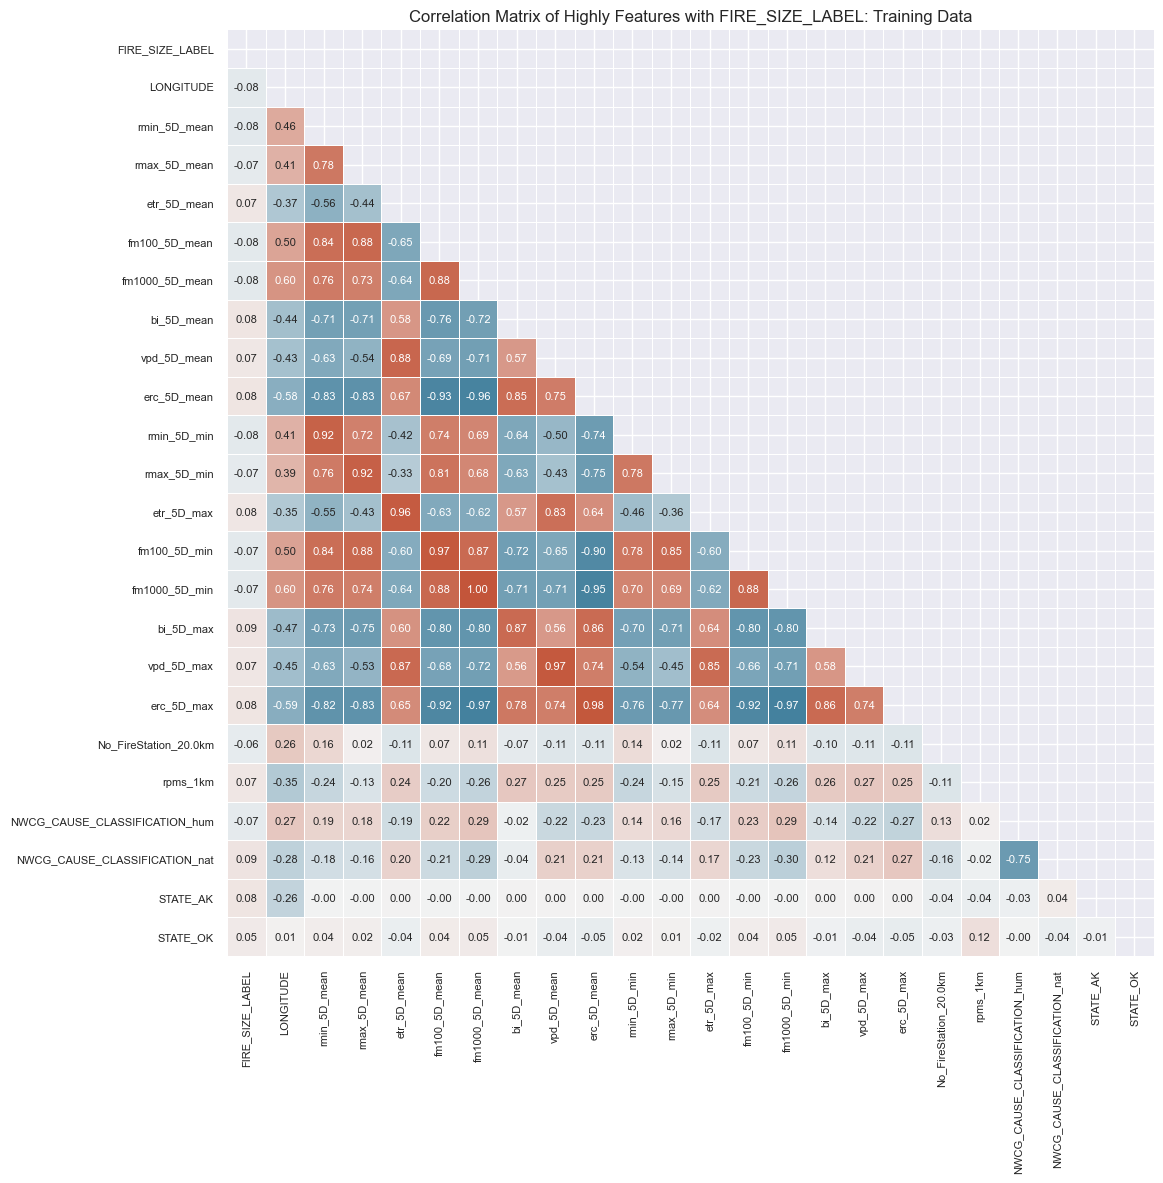

In [53]:
mask = np.triu(np.ones_like(corr_filtered, dtype=bool))      # generate a mask for the upper triangle
fig, ax = plt.subplots(figsize=(12,12))               # setup matplotlib figure
cmap = sns.diverging_palette(230,20, as_cmap=True)  # generate a custom diverging colormap
sns.heatmap(corr_filtered, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={"size": 8}, cbar=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8) 
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8) 
ax.set_title("Correlation Matrix of Highly Features with FIRE_SIZE_LABEL: Training Data")
plt.tight_layout()
plt.show()

**Identify highly correlated features**

In [54]:
# identify highly correlated features
cols = corr_eda.columns.tolist()
high_corr_features = []
high_corr_details = []
for i in range(len(cols)):
    if cols[i] in high_corr_features:
        continue
    for j in range(i,len(cols)):
        if cols[j] in high_corr_features:
            continue
        if i != j:
            val = corr_eda.loc[cols[j]][cols[i]]
            if abs(val) > 0.7:
                high_corr_features.append(cols[j])
                corr_tuple = (cols[i], cols[j], val)
                high_corr_details.append(corr_tuple)

print(f"\nNumber of highly correlated features (threshold of 0.7): {len(high_corr_features)}")
print(f"\nThe highly correlation features are:")
for pair in high_corr_details:
   print(f"* {pair[0]} and {pair[1]}, r = {pair[2]:.2f}")


Number of highly correlated features (threshold of 0.7): 24

The highly correlation features are:
* FIRE_YEAR and GACC_PL_0.0, r = -0.85
* pr_5D_mean and pr_5D_max, r = 0.95
* tmmn_5D_mean and tmmx_5D_mean, r = 0.93
* tmmn_5D_mean and sph_5D_mean, r = 0.85
* tmmn_5D_mean and tmmn_5D_max, r = 0.96
* tmmn_5D_mean and tmmx_5D_max, r = 0.88
* tmmn_5D_mean and sph_5D_min, r = 0.83
* rmin_5D_mean and rmax_5D_mean, r = 0.78
* rmin_5D_mean and fm100_5D_mean, r = 0.84
* rmin_5D_mean and fm1000_5D_mean, r = 0.76
* rmin_5D_mean and bi_5D_mean, r = -0.71
* rmin_5D_mean and erc_5D_mean, r = -0.83
* rmin_5D_mean and rmin_5D_min, r = 0.92
* rmin_5D_mean and rmax_5D_min, r = 0.76
* rmin_5D_mean and fm100_5D_min, r = 0.84
* rmin_5D_mean and fm1000_5D_min, r = 0.76
* rmin_5D_mean and bi_5D_max, r = -0.73
* rmin_5D_mean and erc_5D_max, r = -0.82
* vs_5D_mean and vs_5D_max, r = 0.90
* srad_5D_mean and etr_5D_mean, r = 0.82
* srad_5D_mean and srad_5D_max, r = 0.95
* srad_5D_mean and etr_5D_max, r = 0.74
*

`barplot of the target variable`

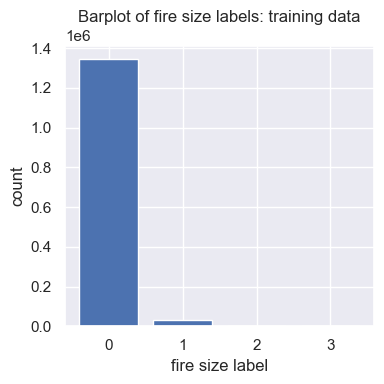

In [55]:
# prepare data for fire_size_label bar plot
fire_size_count = df_train_eda['FIRE_SIZE_LABEL'].value_counts()

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.bar(fire_size_count.index, fire_size_count.values)
ax.set_xlabel('fire size label')
ax.set_ylabel('count')
ax.set_title('Barplot of fire size labels: training data')

plt.tight_layout()
plt.show()

`histograms and barplots of features`

In [56]:
features = list(df_train_eda.columns)
features.remove('FIRE_SIZE_LABEL')

In [57]:
features_numeric = [feat for feat in features if feat not in cols_onehot]

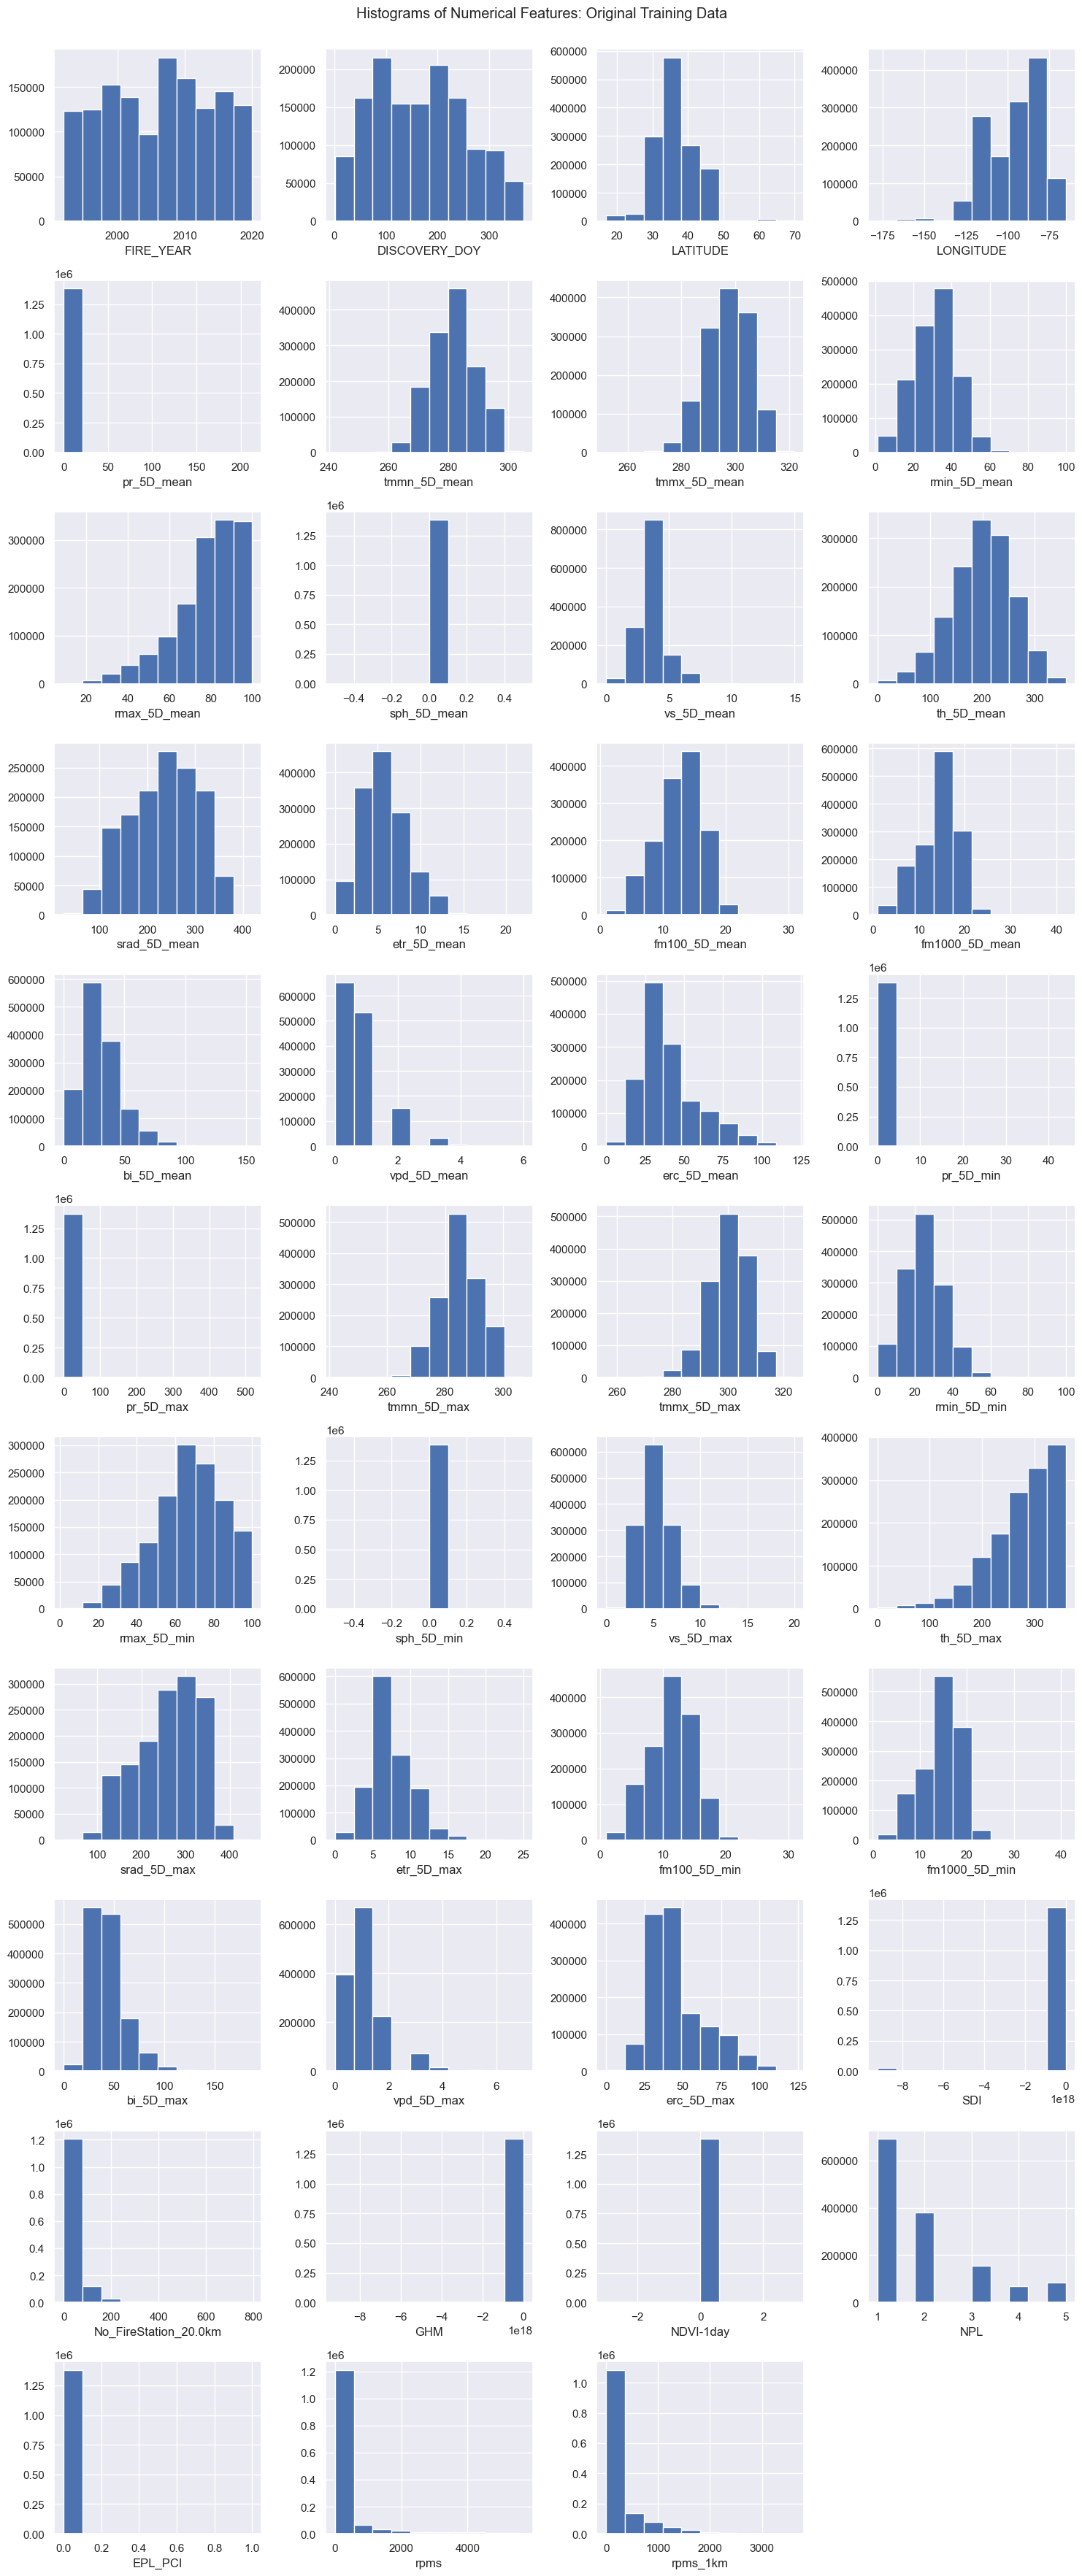

In [58]:
fig = plt.figure(figsize=(15,36))

for i in range(len(features_numeric)):
    ax = fig.add_subplot(11,4,i+1)
    ax.hist(df_train_eda[features_numeric[i]].astype(int))
    ax.set_xlabel(features_numeric[i])

plt.suptitle('Histograms of Numerical Features: Original Training Data')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Barplots of categorical features**

In [59]:
cols_cat

['NWCG_CAUSE_CLASSIFICATION', 'GACC_PL', 'STATE']

In [60]:
df_train_cat = df_train[cols_cat]

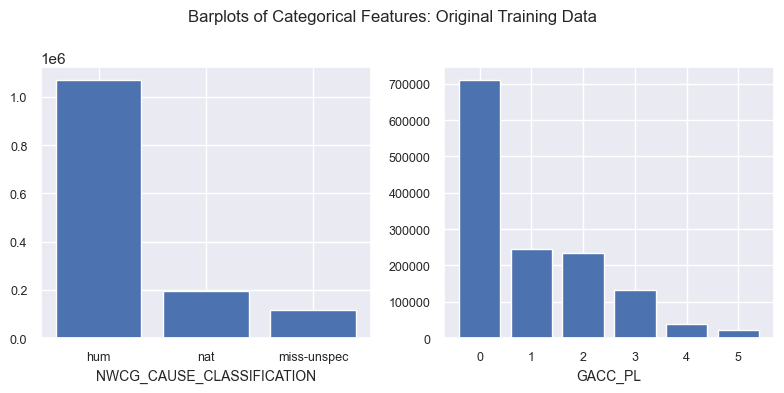

In [61]:
fig = plt.figure(figsize=(8,4))

for i in range(2):
    # prepare the data
    feat_count = df_train_cat[cols_cat[i]].value_counts()
    # create barplot
    ax = fig.add_subplot(1,2,i+1)
    ax.bar(feat_count.index, feat_count.values)
    ax.set_xlabel(cols_cat[i], fontsize=10)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', labelsize=9)

plt.suptitle('Barplots of Categorical Features: Original Training Data', fontsize=12)
plt.tight_layout()
plt.show()

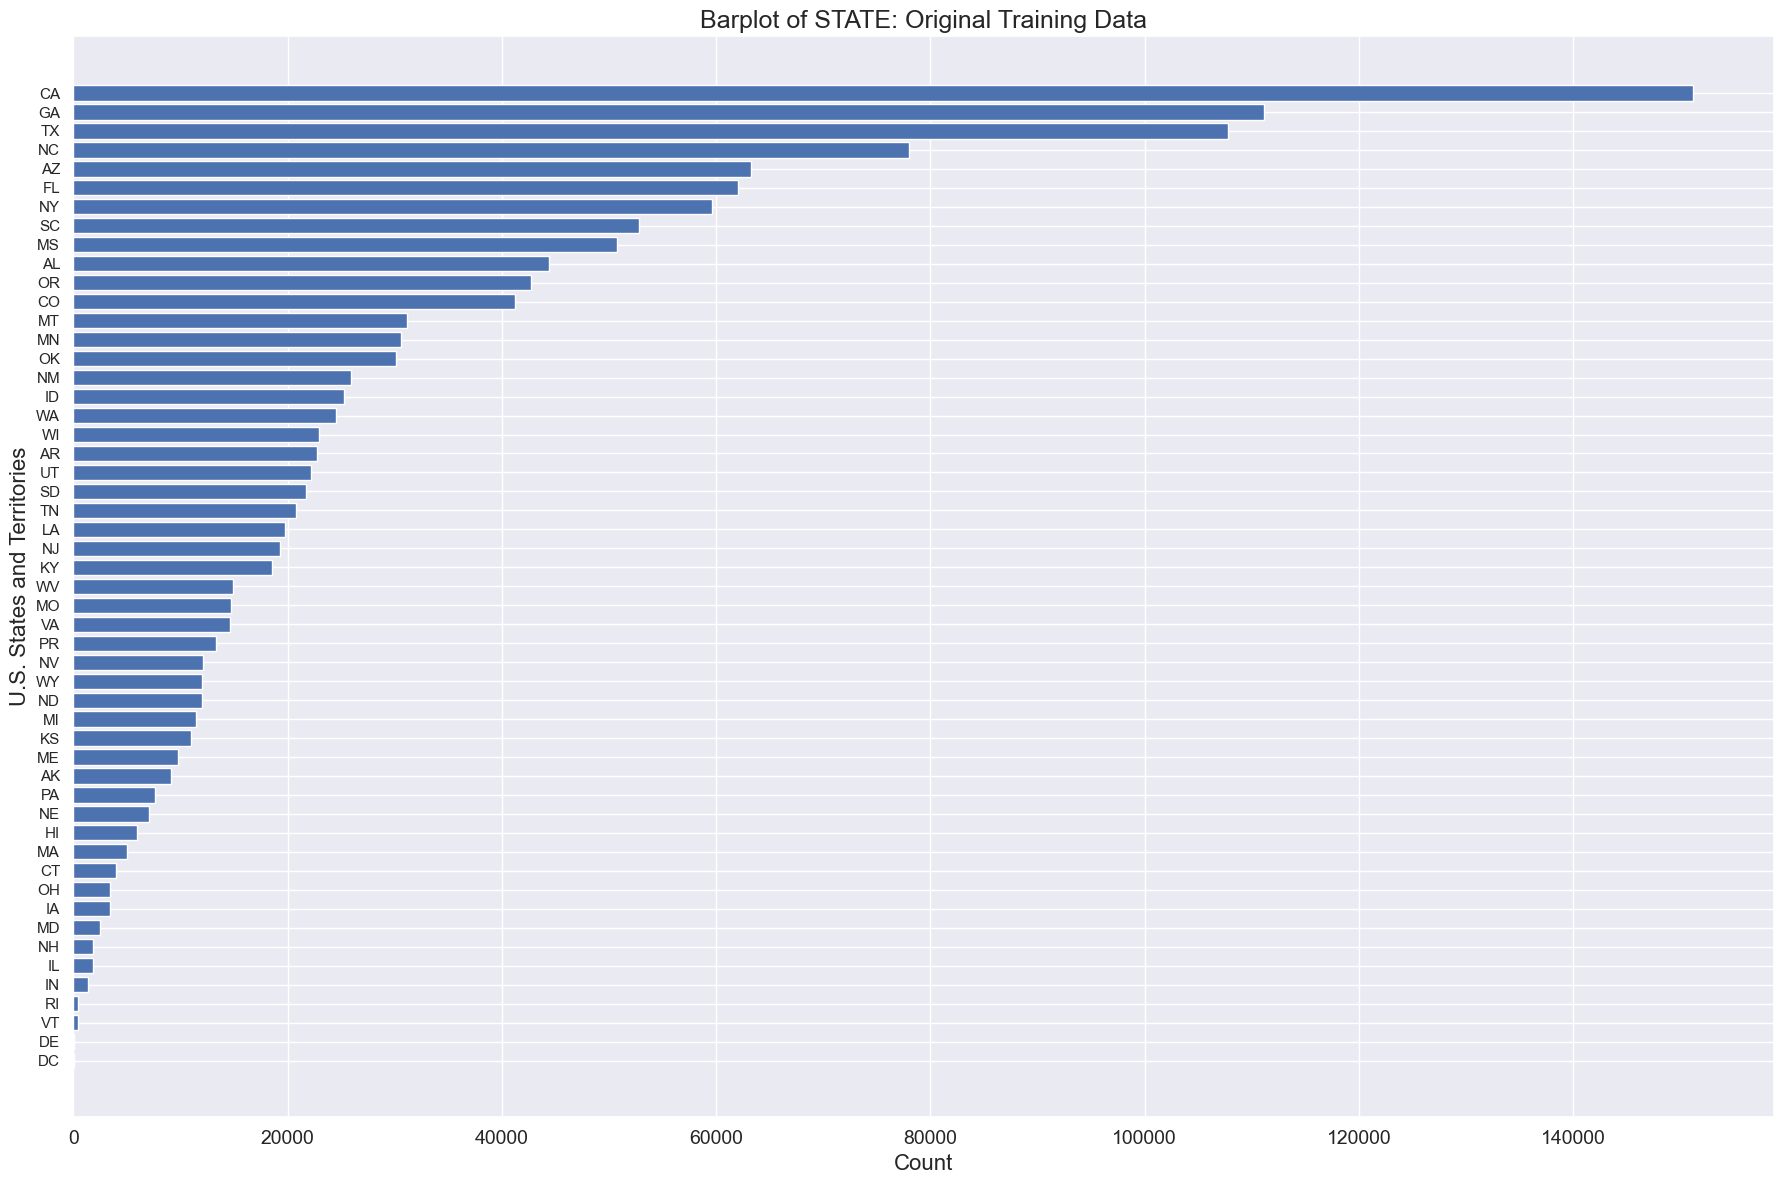

In [62]:
# prepare state data for bar plot
state_count = df_train_cat['STATE'].value_counts()

fig, ax = plt.subplots(1,1, figsize=(18,12))
ax.barh(state_count.index, state_count.values)
ax.invert_yaxis()
ax.set_ylabel('U.S. States and Territories', fontsize=16)
ax.set_xlabel('Count', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.set_title('Barplot of STATE: Original Training Data', fontsize=18)

plt.tight_layout()
plt.show()